## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
# Read from CSV file
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
# Randomly sample 5 records
df.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
23587,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,6.0,7.0
7009,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0
27669,0.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,5.0,0.0,15.0,1.0,0.0,6.0,5.0,5.0
67237,1.0,1.0,1.0,1.0,41.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,5.0,7.0
47497,1.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,6.0,6.0


In [4]:
# Check the columns using dtypes
print(df.dtypes)

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [5]:
# Check for missing values
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
# Compute summary statistics
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<AxesSubplot:title={'center':'Diabetes_binary'}>,
        <AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'GenHlth'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
       

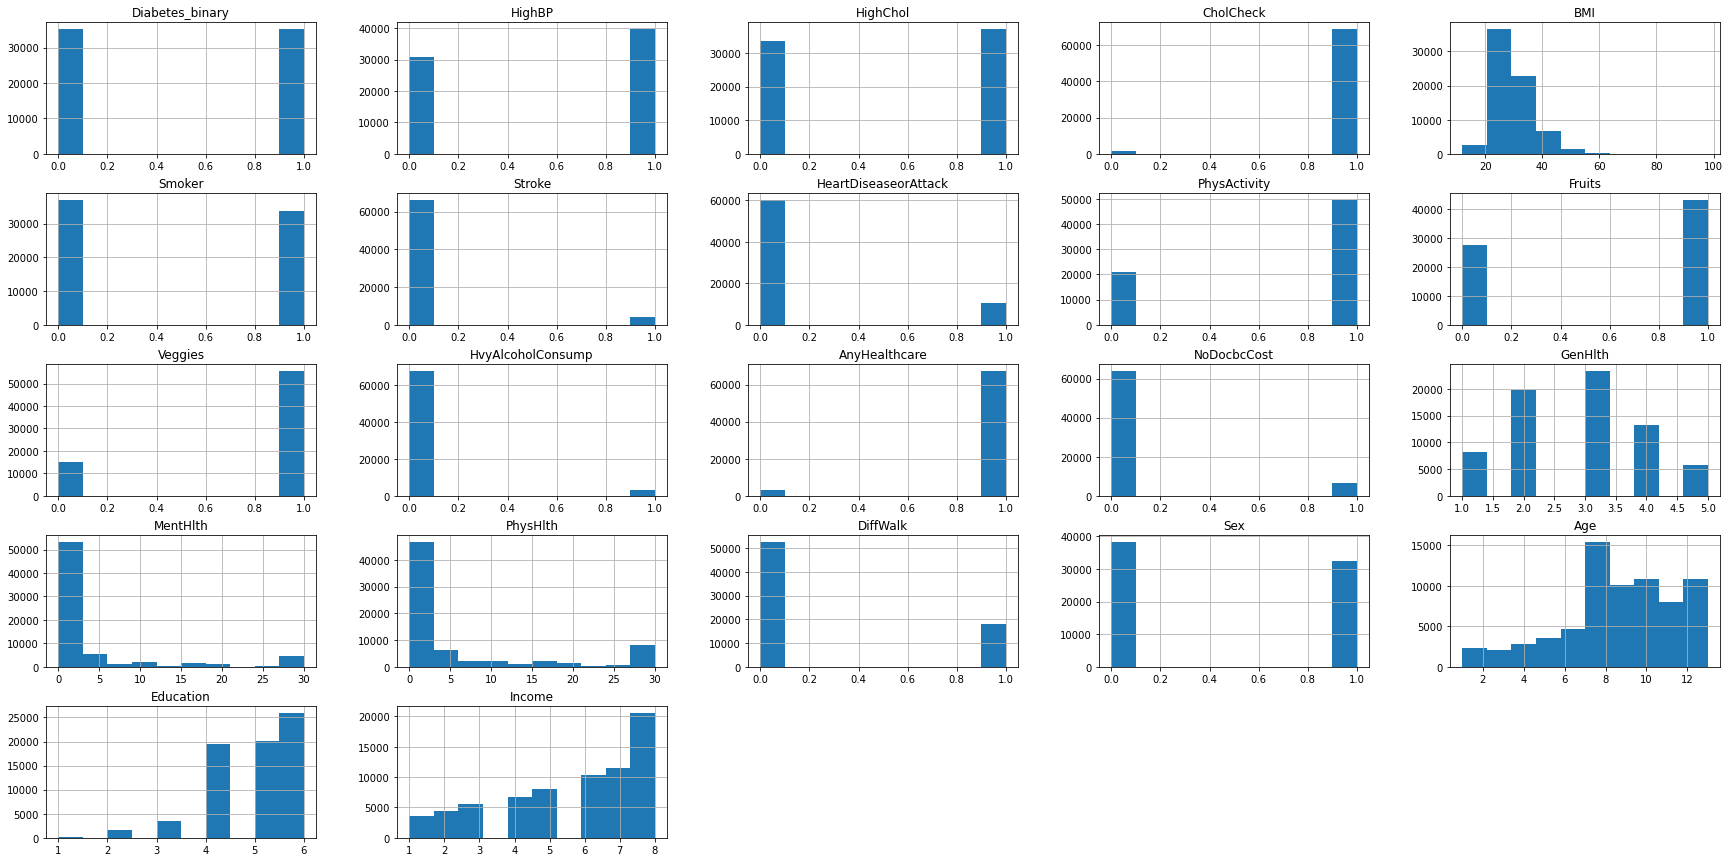

In [7]:
df.hist(figsize=(30,15))

<AxesSubplot:>

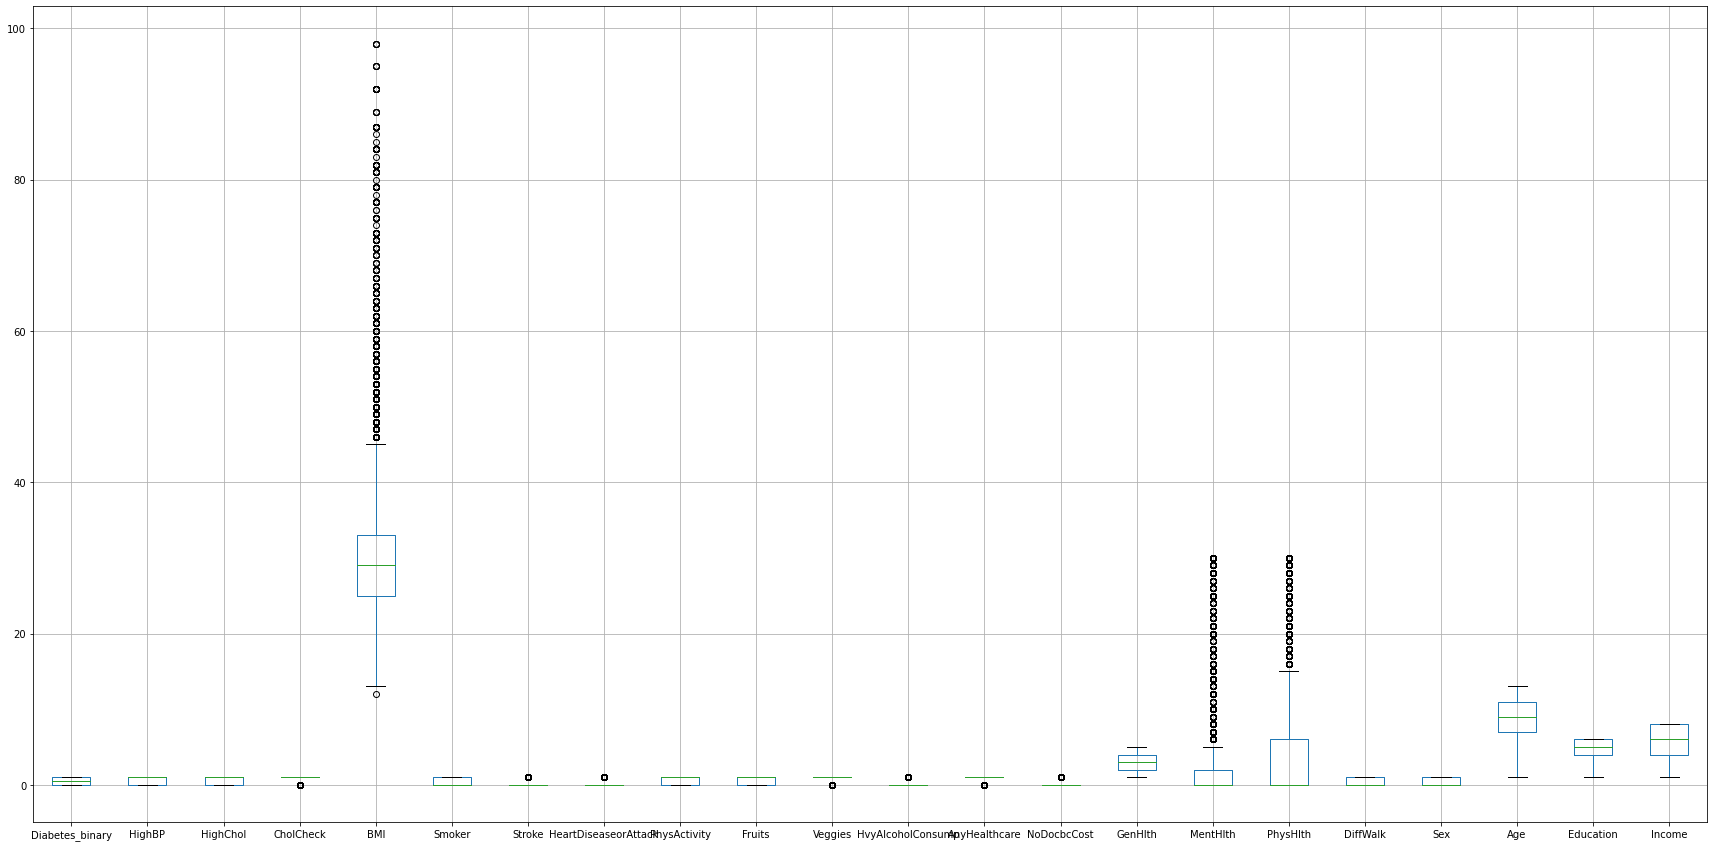

In [8]:
df.boxplot(figsize=(30,15))

### <u>Data Summary</u>
##### Binary Variables
- Diabetes_binary        
- HighBP                  
- HighChol                
- CholCheck                                  
- Smoker                  
- Stroke                 
- HeartDiseaseorAttack    
- PhysActivity            
- Fruits                  
- Veggies                 
- HvyAlcoholConsump      
- AnyHealthcare           
- NoDocbcCost              
- DiffWalk                
- Sex                    
  
##### Ordinal Variables
- GenHlth                
- MentHlth                
- PhysHlth 
- Age                     
- Education               
- Income 

##### Continous Variable
- BMI  

# <hr>

### Convert BMI to ordinal data type by binning

- Bin 0: If BMI is less than 18.5, it falls within the underweight range.
- Bin 1: If BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
- Bin 2: If BMI is 25.0 to 29.9, it falls within the overweight range.
- Bin 3: If BMI is 30.0 or higher, it falls within the obese range.

In [9]:
bins = [0, 18.5, 25, 30, 100]


df["BMI_bins"] = pd.cut(df["BMI"], bins=bins, right=False, labels=False)

df["BMI_bins"].convert_dtypes(convert_floating=True)

df


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_bins
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,2
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,2
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,2
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,2
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,3
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0,2
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,2
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

array([[<AxesSubplot:title={'center':'Diabetes_binary'}>,
        <AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'GenHlth'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
       

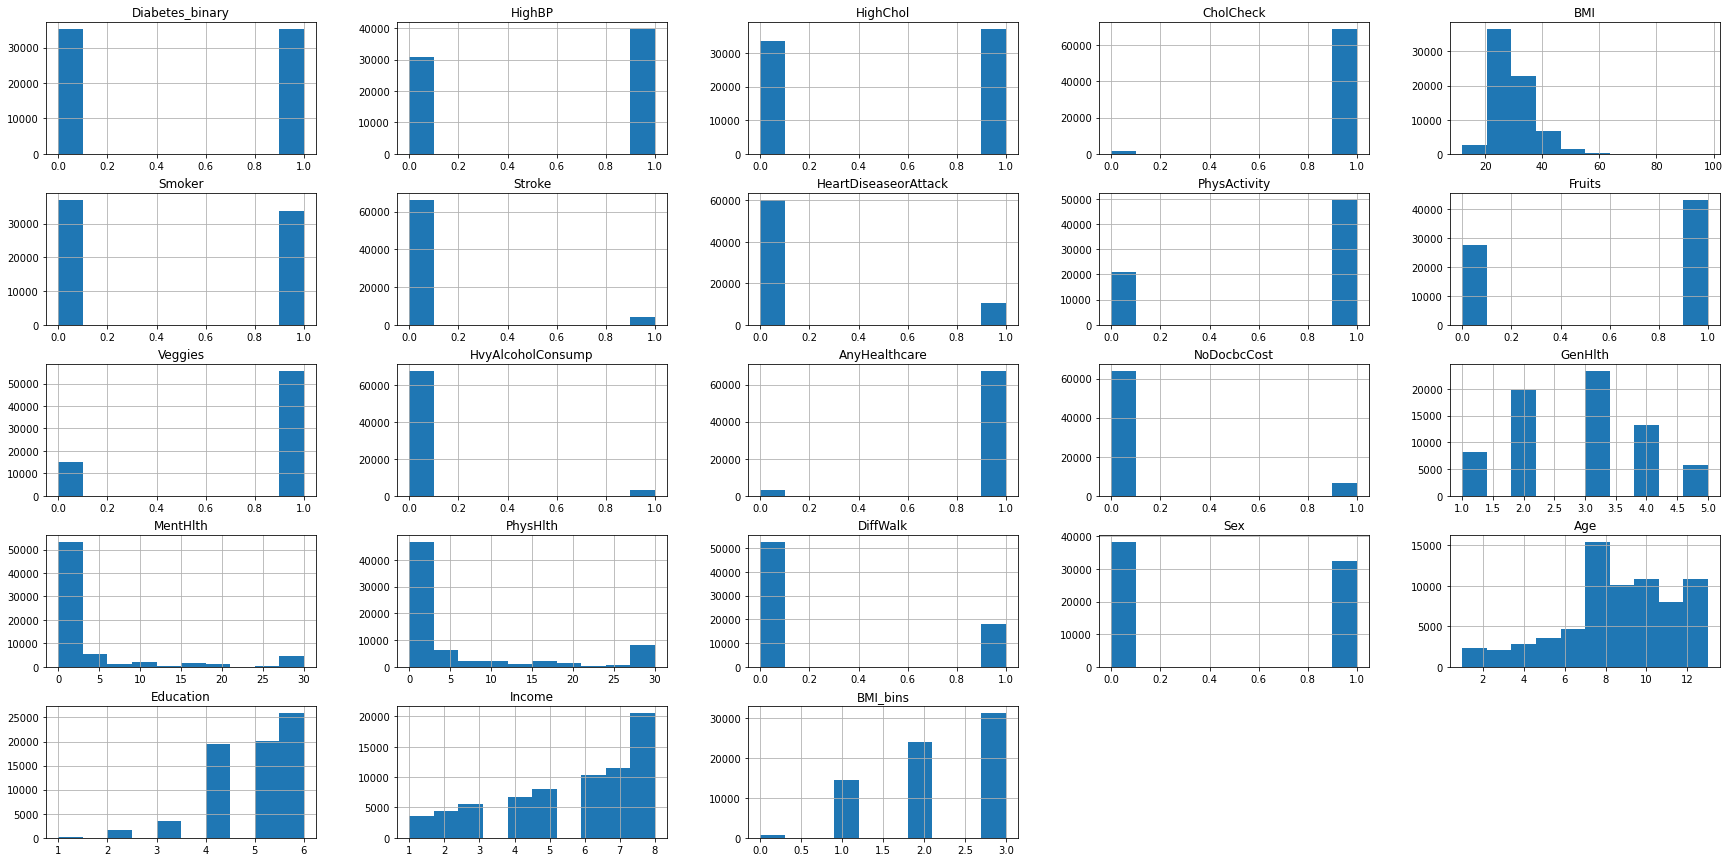

In [11]:
df.hist(figsize=(30,15))

###### <u>Data Summary - After binning BMI</u>
##### Binary Variables
- Diabetes_binary        
- HighBP                  
- HighChol                
- CholCheck                                  
- Smoker                  
- Stroke                 
- HeartDiseaseorAttack    
- PhysActivity            
- Fruits                  
- Veggies                 
- HvyAlcoholConsump      
- AnyHealthcare           
- NoDocbcCost              
- DiffWalk                
- Sex                    
  
##### Ordinal Variables
- GenHlth                
- MentHlth                
- PhysHlth 
- Age                     
- Education               
- Income 
- BMI_bins

<hr>

### Covariance and Correlation

In [12]:
# Compute covarariance
df.cov()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_bins
Diabetes_binary,0.250004,0.094609,0.072209,0.008962,1.043527,0.021474,0.015143,0.037537,-0.036249,-0.013177,...,0.005977,0.226953,0.354890,1.072046,0.059244,0.011062,0.397505,-0.087720,-0.244112,0.119563
HighBP,0.094609,0.245977,0.078386,0.007957,0.850371,0.021657,0.015456,0.037097,-0.030843,-0.009874,...,0.003836,0.177029,0.260059,0.867953,0.050604,0.010085,0.478306,-0.072292,-0.202446,0.102532
HighChol,0.072209,0.078386,0.249343,0.006669,0.466451,0.023291,0.012032,0.032111,-0.020638,-0.011531,...,0.004836,0.132217,0.341600,0.716548,0.035164,0.004309,0.342289,-0.043363,-0.117063,0.062710
CholCheck,0.008962,0.007957,0.006669,0.024129,0.050443,-0.000336,0.000845,0.002398,-0.000586,0.001316,...,-0.002840,0.010243,-0.013505,0.053987,0.002999,-0.000618,0.045077,-0.001390,0.002551,0.006718
BMI,1.043527,0.850371,0.466451,0.050443,50.608339,0.041038,0.039390,0.152387,-0.555634,-0.292976,...,0.136615,2.122164,6.073490,11.586486,0.760820,0.002932,-0.784176,-0.733787,-1.932397,4.383630
Smoker,0.021474,0.021657,0.023291,-0.000336,0.041038,0.249392,0.007797,0.022052,-0.018214,-0.018207,...,0.005215,0.084759,0.371675,0.606507,0.025997,0.027894,0.150160,-0.072445,-0.113761,0.010661
Stroke,0.015143,0.015456,0.012032,0.000845,0.039390,0.007797,0.058307,0.019145,-0.008825,-0.001059,...,0.002550,0.050940,0.171928,0.399658,0.020176,0.000460,0.085316,-0.018370,-0.071736,0.004460
HeartDiseaseorAttack,0.037537,0.037097,0.032111,0.002398,0.152387,0.022052,0.019145,0.125964,-0.015929,-0.003362,...,0.003730,0.109028,0.217255,0.708590,0.035878,0.017355,0.224600,-0.035267,-0.113291,0.020153
PhysActivity,-0.036249,-0.030843,-0.020638,-0.000586,-0.555634,-0.018214,-0.008825,-0.015929,0.208779,0.029797,...,-0.008437,-0.139185,-0.484779,-1.078156,-0.054978,0.011780,-0.131303,0.089468,0.195352,-0.052654
Fruits,-0.013177,-0.009874,-0.011531,0.001316,-0.292976,-0.018207,-0.001059,-0.003362,0.029797,0.237505,...,-0.006517,-0.053556,-0.246833,-0.238188,-0.010756,-0.021539,0.084922,0.049507,0.083755,-0.032829


In [13]:
# Compute correlation
corr = df.corr()

corr

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_bins
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449,0.299578
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657,0.259001
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777,0.157335
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550,0.054181
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878,0.771988
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725,0.026746
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577,0.023140
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748,0.071138
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551,-0.144371
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009,-0.084394


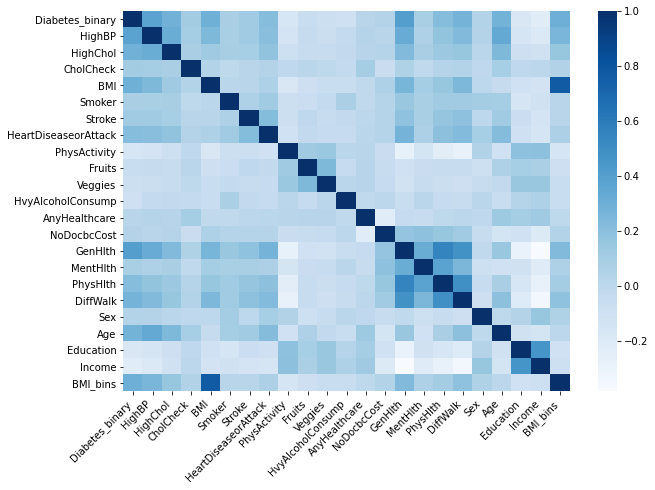

In [14]:
# Draw heatmap
plt.figure(figsize=(10,7))
ax = sns.heatmap(corr, cmap="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


plt.show()

In [15]:
# Print the values with a correlation coefficient greater than 0.25 between the 'Diabetes_binary' column and other columns
for i in range(len(corr.columns)):
    if abs(corr.loc['Diabetes_binary', corr.columns[i]]) > 0.25:
        print(f"{'Diabetes_binary'} and {corr.columns[i]} have a correlation coefficient of {corr.loc['Diabetes_binary', corr.columns[i]]}")

Diabetes_binary and Diabetes_binary have a correlation coefficient of 1.0
Diabetes_binary and HighBP have a correlation coefficient of 0.3815155489073117
Diabetes_binary and HighChol have a correlation coefficient of 0.28921280708865016
Diabetes_binary and BMI have a correlation coefficient of 0.29337274476103575
Diabetes_binary and GenHlth have a correlation coefficient of 0.4076115984949182
Diabetes_binary and DiffWalk have a correlation coefficient of 0.272646006159808
Diabetes_binary and Age have a correlation coefficient of 0.27873806628188813
Diabetes_binary and BMI_bins have a correlation coefficient of 0.2995782127672782


This variables have more correlated with the target variable Diabetes_binary - Greater than 0.25
- Diabetes_binary and HighBP have a correlation coefficient of 0.3815155489073117
- Diabetes_binary and HighChol have a correlation coefficient of 0.28921280708865016
- Diabetes_binary and BMI have a correlation coefficient of 0.29337274476103575
- Diabetes_binary and GenHlth have a correlation coefficient of 0.4076115984949182
- Diabetes_binary and DiffWalk have a correlation coefficient of 0.272646006159808
- Diabetes_binary and Age have a correlation coefficient of 0.27873806628188813
- Diabetes_binary and BMI_bins have a correlation coefficient of 0.2995782127672782

## Mutual Information Feature Selection

C:\Users\Anirban Ghosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Feature 13: 0.091729
Feature 0: 0.077367
Feature 3: 0.055504
Feature 21: 0.048699
Feature 18: 0.046296
Feature 16: 0.043121
Feature 1: 0.042488
Feature 20: 0.028548
Feature 6: 0.023266
Feature 15: 0.021278
Feature 19: 0.017220
Feature 7: 0.013948
Feature 2: 0.012798
Feature 5: 0.009576
Feature 10: 0.009239
Feature 9: 0.005646
Feature 14: 0.005578
Feature 11: 0.005022
Feature 8: 0.004210
Feature 4: 0.004069
Feature 12: 0.000446
Feature 17: 0.000060


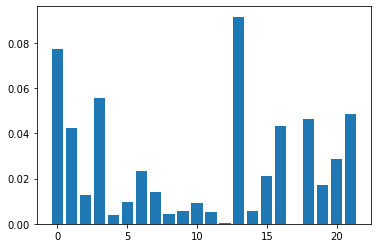

In [16]:
# example of mutual information feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
 
# retrieve numpy array
dataset = df.values
# split into input (X) and output (y) variables
# input is all other columns except column 1: "diabetes_binary" which is output
X = dataset[:, 1:]
y = dataset[:,0:1]
# format all fields as string
X = X.astype(str)

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# what are scores for the features in descending order
indexed_scores = list(zip(range(len(fs.scores_)), fs.scores_))
sorted_scores = sorted(indexed_scores, key=lambda x: x[1], reverse=True)
for i, score in sorted_scores:
    print('Feature %d: %f' % (i, score))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

## For Manual Information FS, the top features are:
  1. GenHlth (13)
  2. HighBP (0)
  3. BMI (3)
  4. BMI_bins (21)
  5. HighChol (1)
  6. Age (18)
  7. DiffWalk (16)
  8. PhysHealth (15)
  9. Income (20)
  10. Education (19)

In [17]:
# Get cleaned data CSV file
# df.to_csv('cleaned_data.csv', index=False)

<hr>